---
# Poisson Process Project 2

---

### Imports

In [16]:
import numpy as np
import math
import matplotlib.pyplot as plt

### Donées de l'énoncé

In [17]:
# Valeurs du sujet 
C = 200e3  # b/s
W = 250e3  # Hz
K = 10**6
gamma = 2.8
p = 0.01
lambda_u = 0.01  # users per square meter
R = 300  # meters
SNR_min = 0.1



In [18]:
# Calculation of N_max

N_max = math.ceil(C/(W * math.log2(1 + SNR_min)))

## Question 1

*Show that the process of active customers is a Poisson process. Give its intensity measure.*



Les utilisateurs $ (x_i) $ sont  actifs avec une proba p. L'activité des utilisateurs suit donc une loi de bernouilli iid de paramètre p. On peut appliquer le théroème de "Thinning" et le processus des utlisateurs actifs est un processus de poisson spatial d'intensité $p \cdot \lambda \mathrm d x$.

## Question 2

*What is the mean number of active customers in the cell ?*

On applique l'intégrale sur l'espace E en entie qui est ici un disque de rayon R. On obtient $p\lambda \cdot \pi R^2$ pour le nombre moyen d'utilisateurs actifs. 
Ce qui fait, avec les données du problème :  $0.01 ^2 \cdot 300 ^2 \cdot \pi =\approx 28$
  


## Question 3

*For $k = 1, \dots , N_{max}$, characterize geometrically the subset of the cell in which all customers require $k$ subcarriers.*

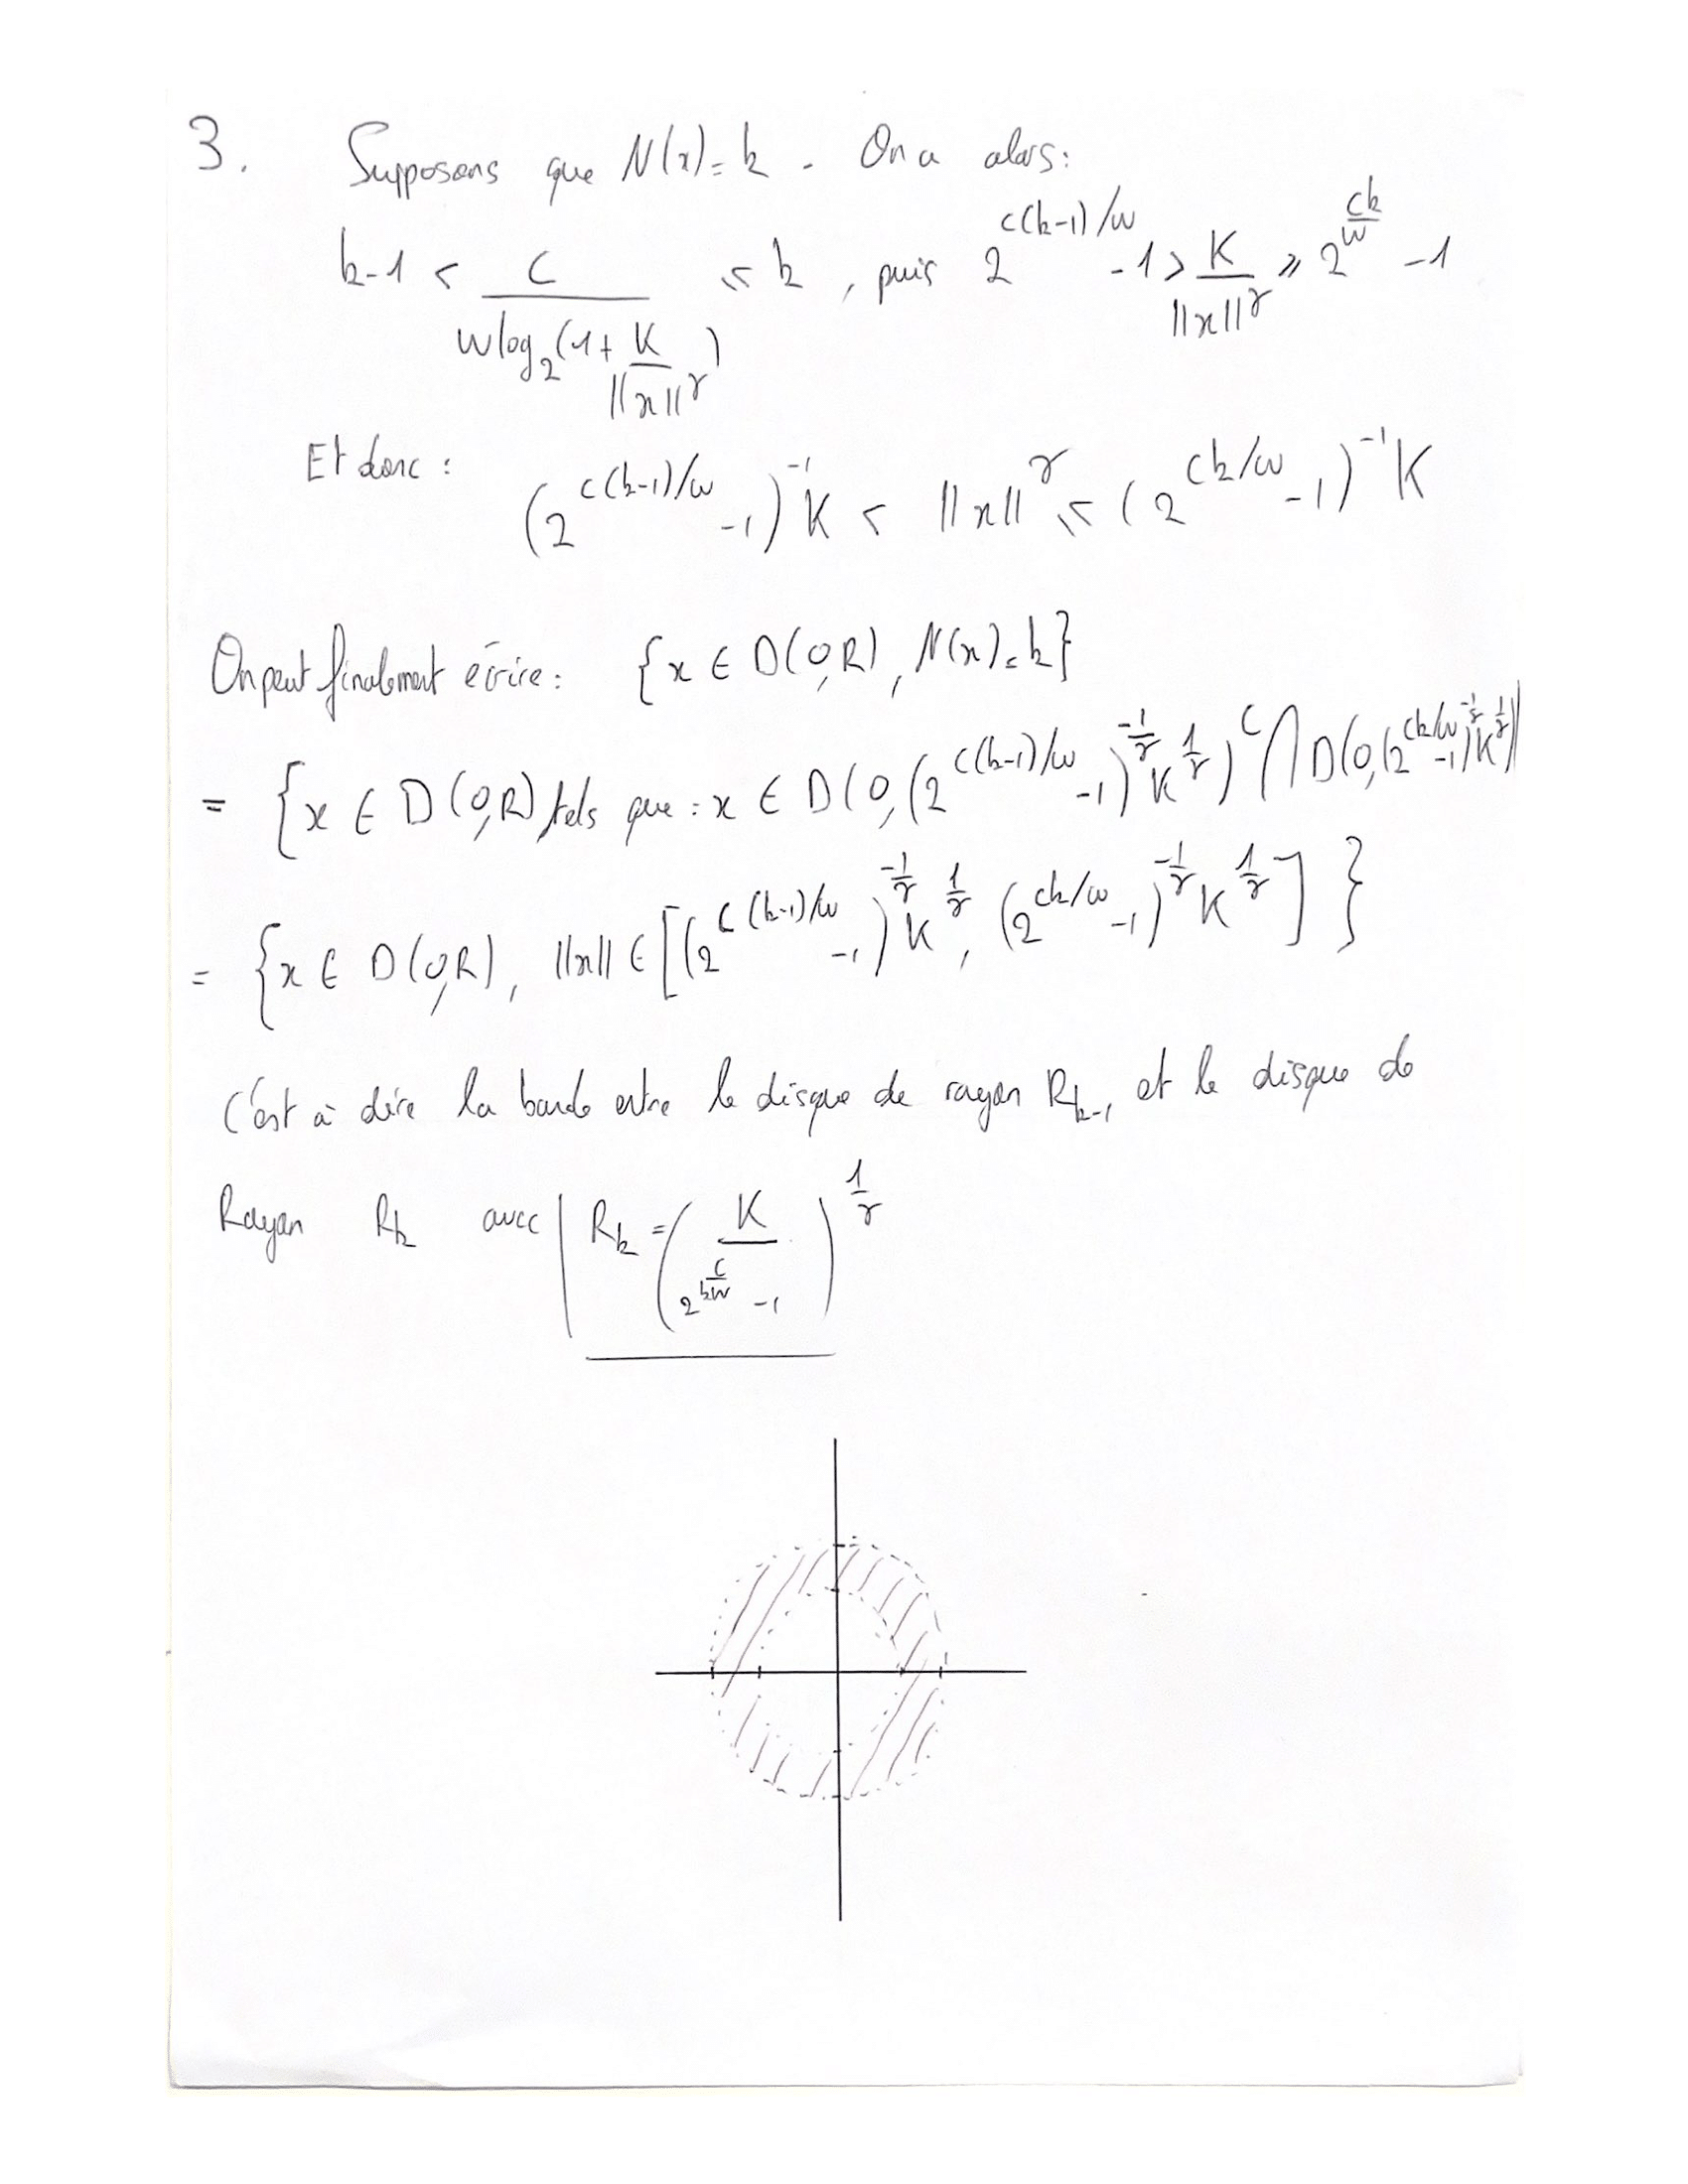

## Question 4

*What is the distribution of $A_3$, the number of customers requiring 3 subcarriers ?*


D'après l'énoncé et en utilisant le théorème 5.3 sur la loi de distribution de N(A) avec A un sous-ensemble de E, on a que $A_3$ suit une loi de poisson de paramètre $ \lambda $ * Aire($A_3$) = $ \lambda \pi p (R_3 ^2 - R_2 ^2) $

## Question 5

Pour confirmer ce résultat, nous pouvons simuler un processus de Poisson spatial dans le cercle de rayon RR, puis utiliser la fonction kstest du module scipy.stats en Python pour vérifier si le nombre de points dans le domaine A_3A_3 suit une loi de Poisson de paramètre λ∣A_3∣λ∣A_3∣.

## Question 6

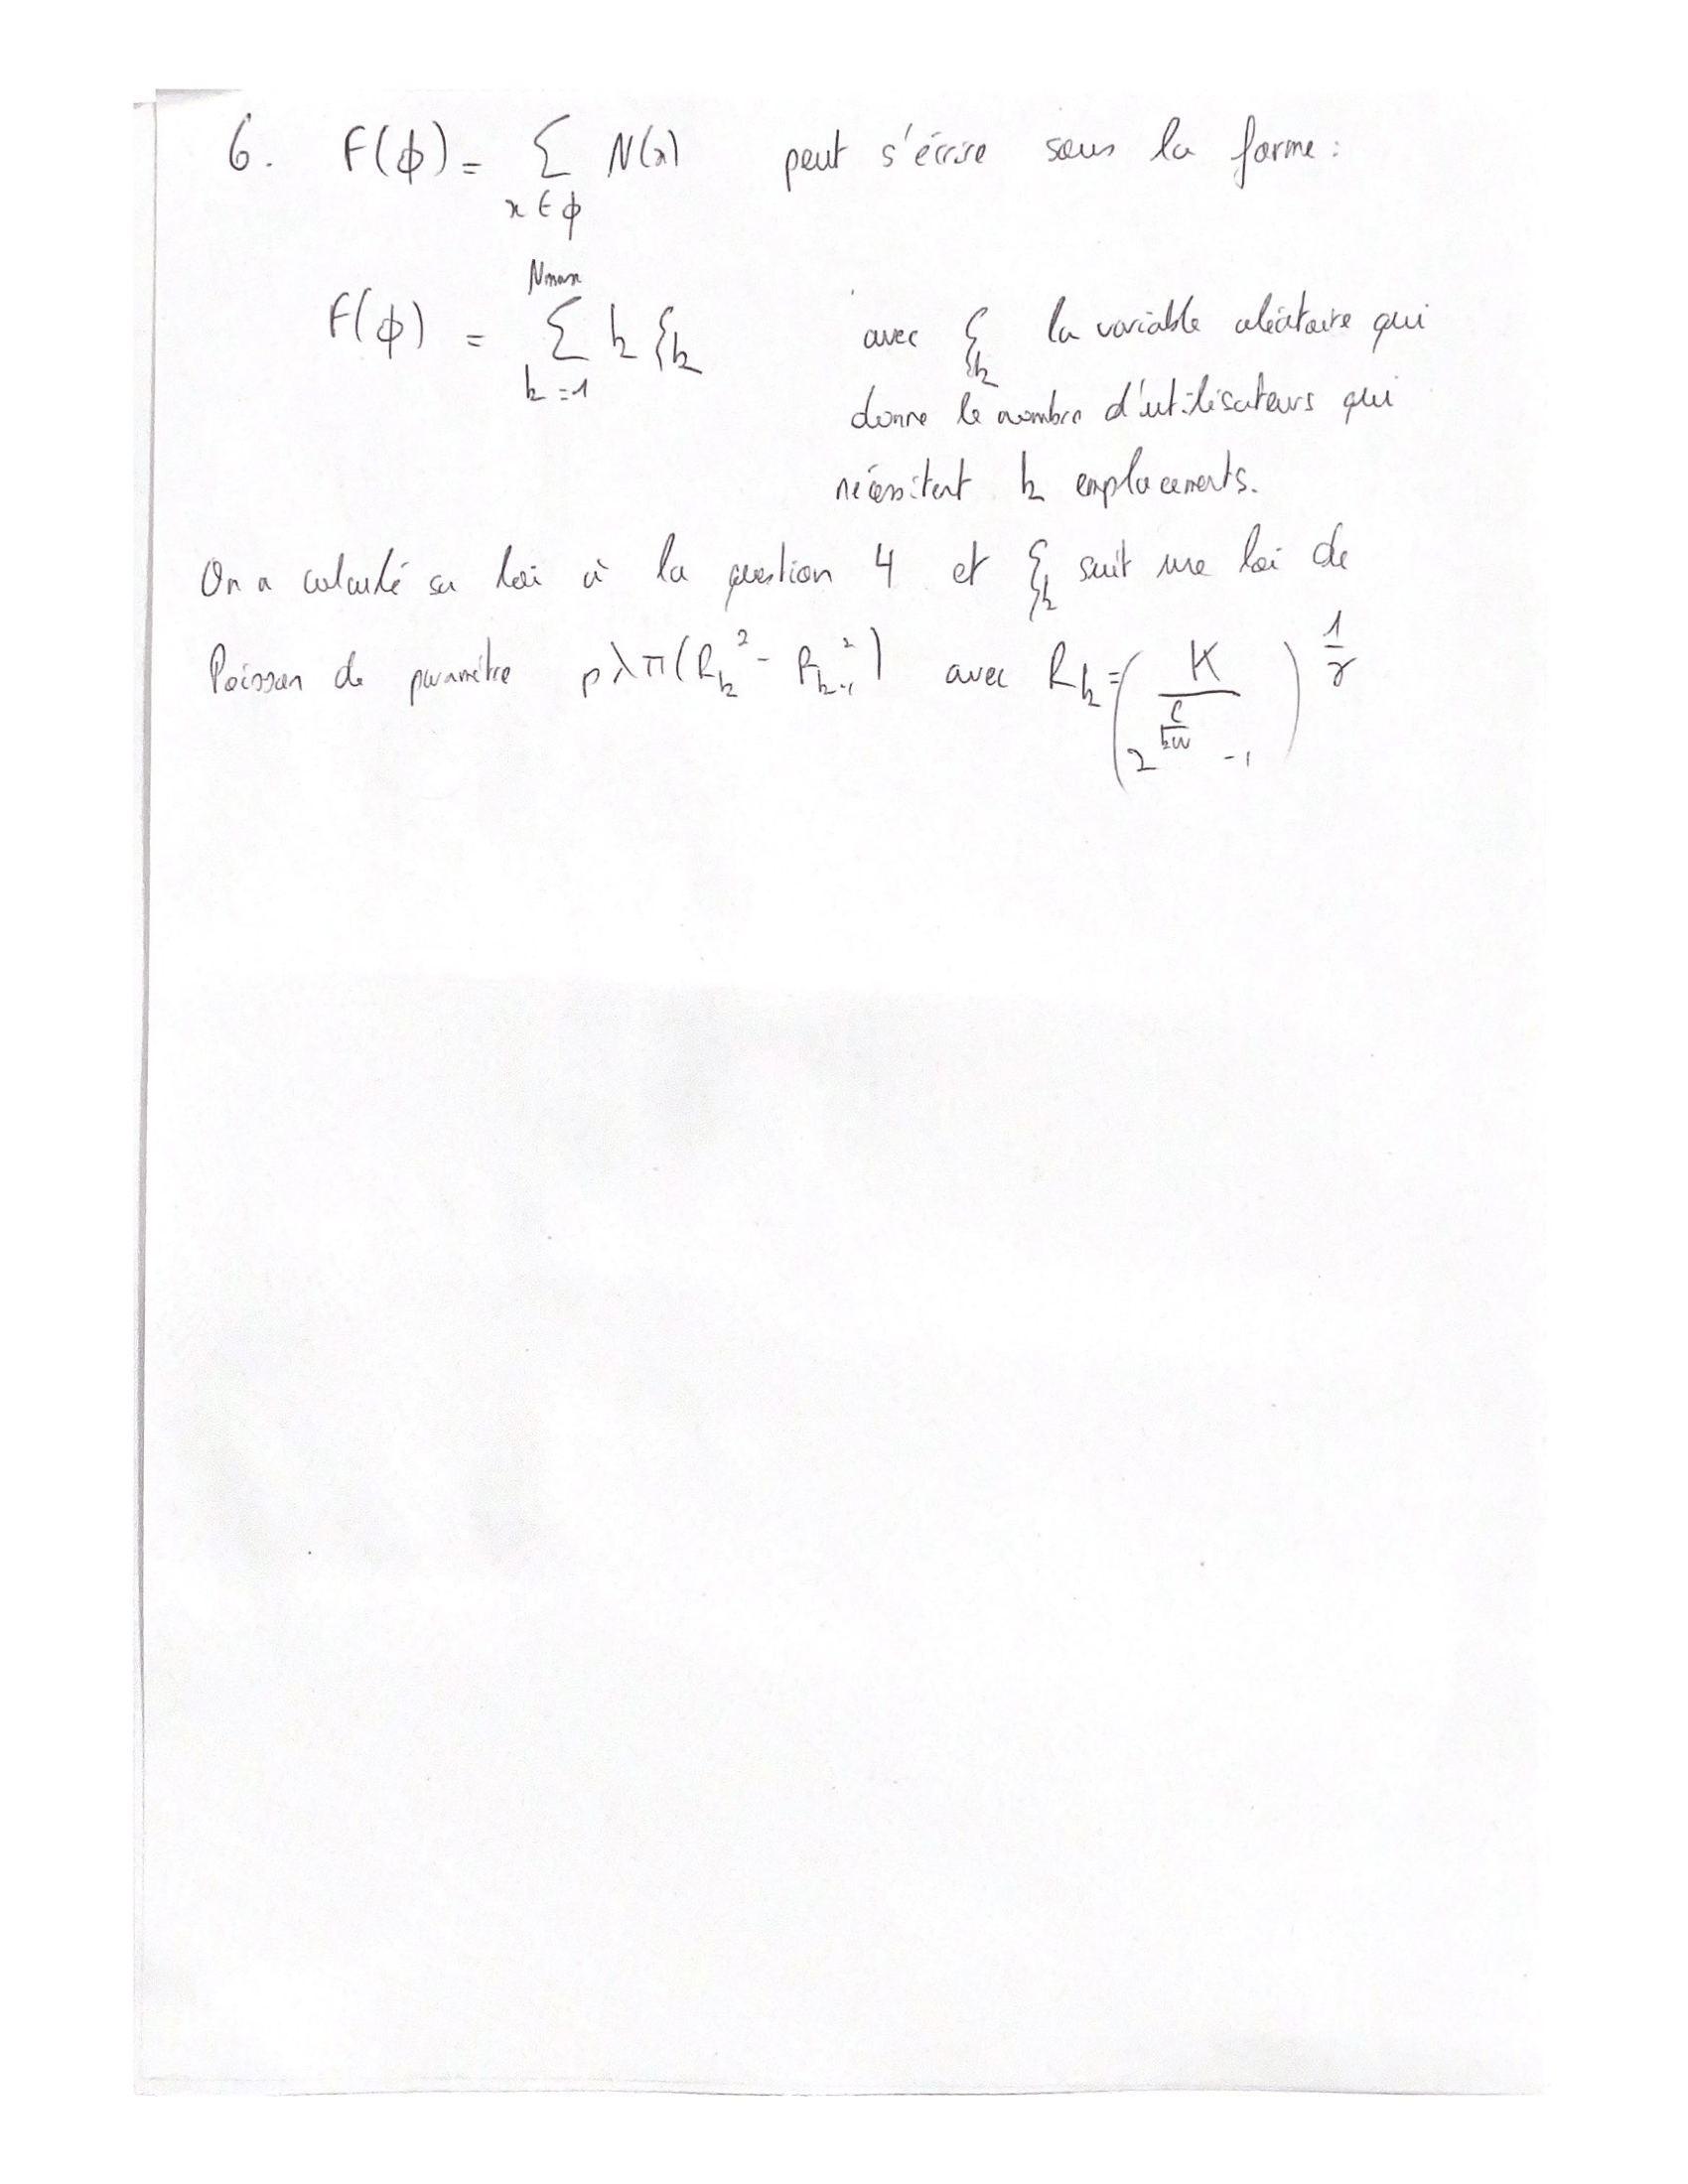

In [19]:
# Computation of mu(k)
def R(k):
    if k == 0:
        return 0
    else:
        return (K / (2**(C / (W * k)) - 1))**(1/gamma)

# Calculation of mu(k)    
def mu(k):
    return p * lambda_u * np.pi * (R(k)**2 - R(k-1)**2)

# Print the results
for k in range(1, N_max + 1): 
    print(f"μ{k}: {mu(k):.4f}")

μ1: 7.5129
μ2: 6.1898
μ3: 5.2413
μ4: 4.7192
μ5: 4.3708
μ6: 4.1143


## Question 7

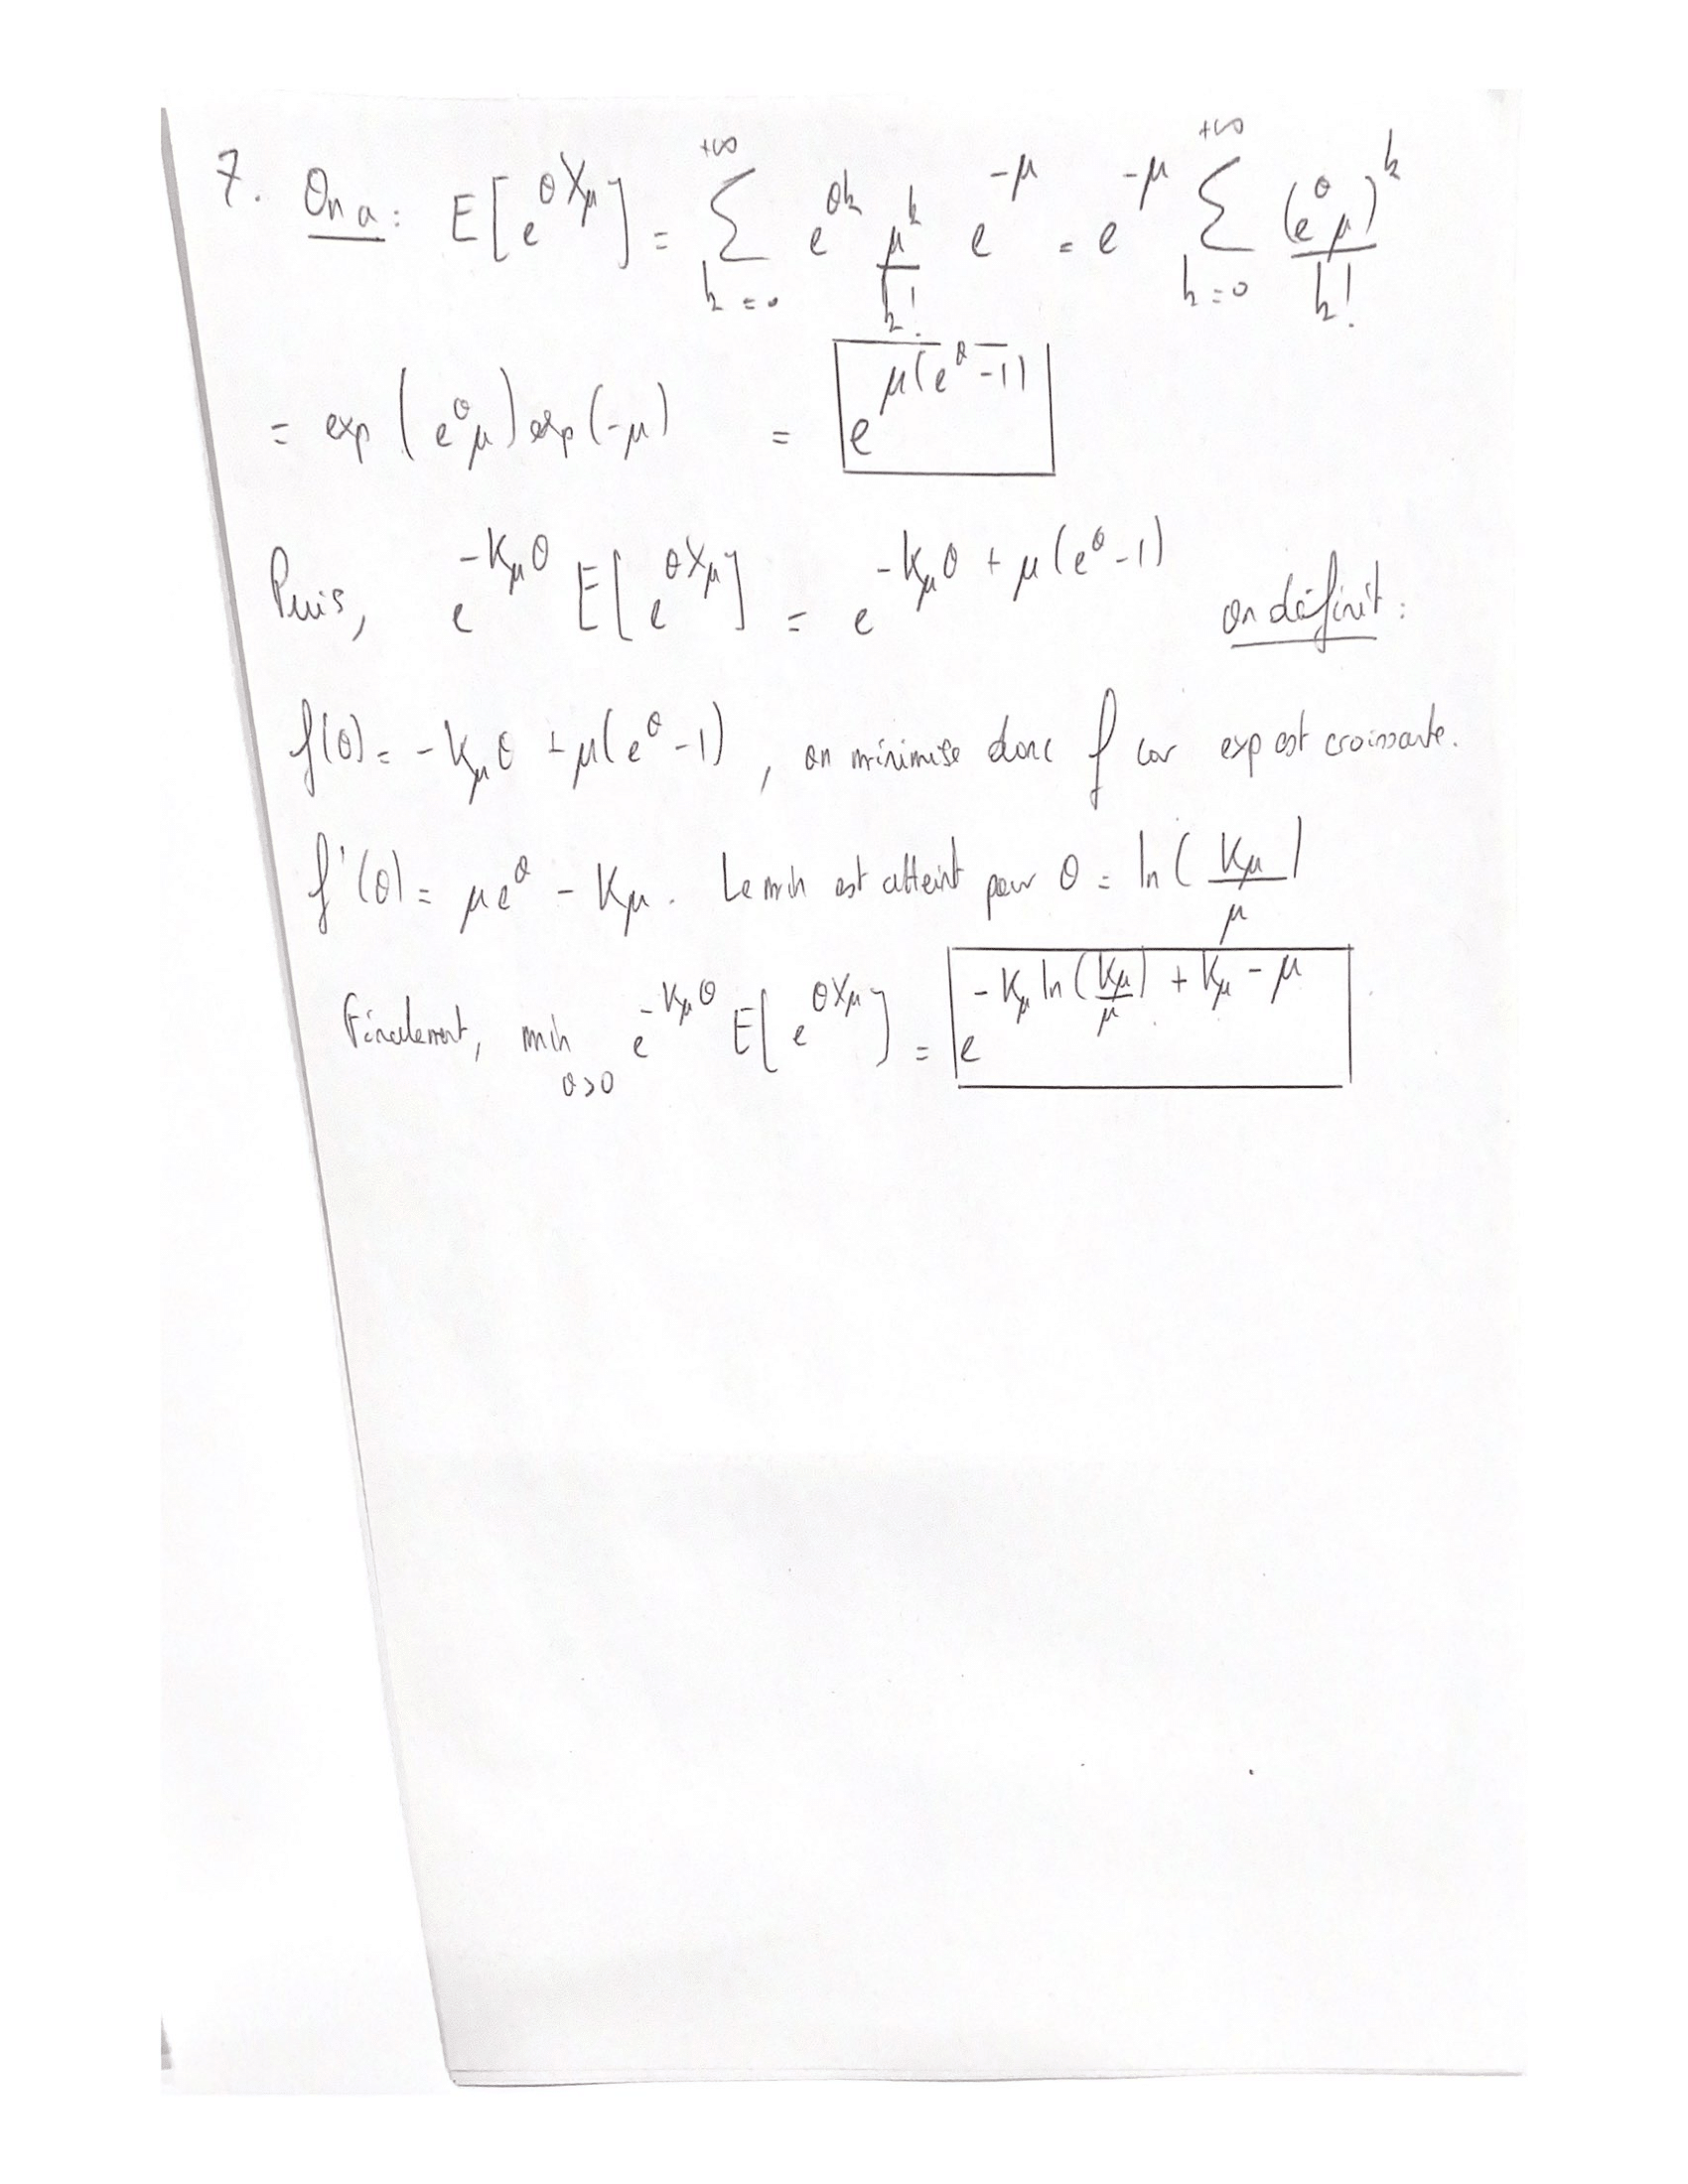

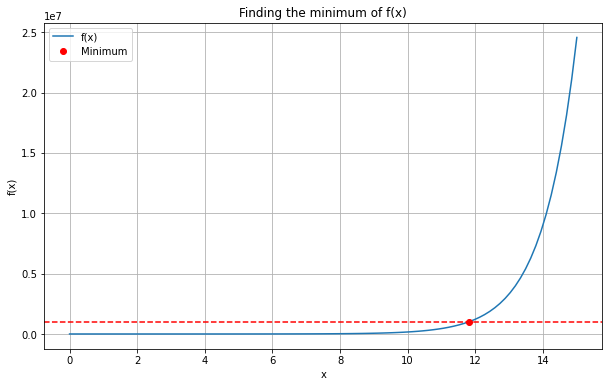

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x, mu):
    """
    Returns the value of the function -K*x + mu*(np.exp(x) -1) for a given x and mu.
    """
    K = 1.3 # Constant value of K
    return -K*x + mu*(np.exp(x) -1)

# Define the value of mu_1
mu_1 = 7.5129

# Generate an array of x values from 0 to 15 with 100 points
x = np.linspace(0, 15, 100)

# Calculate the corresponding y values using the function f(x) with mu_1
y = f(x, mu_1)

# Calculate the value of x_min that minimizes f(x)
x_min = np.log(K/mu_1)

# Plot the function f(x) and the minimum
plt.figure(figsize=(10, 6)) # Set the size of the figure
plt.plot(x, y, label='f(x)') # Plot the function f(x)
plt.plot(x_min, f(x_min, mu_1), 'ro', label='Minimum') # Plot the minimum as a red dot
plt.axhline(f(x_min, mu_1), color='r', linestyle='--') # Plot a horizontal line at the minimum value

plt.title('Finding the minimum of f(x)') # Set the title of the plot
plt.xlabel('x') # Set the x-axis label
plt.ylabel('f(x)') # Set the y-axis label
plt.legend() # Show the legend

plt.grid(True) # Show grid lines
plt.show() # Display the plot


## Question 8

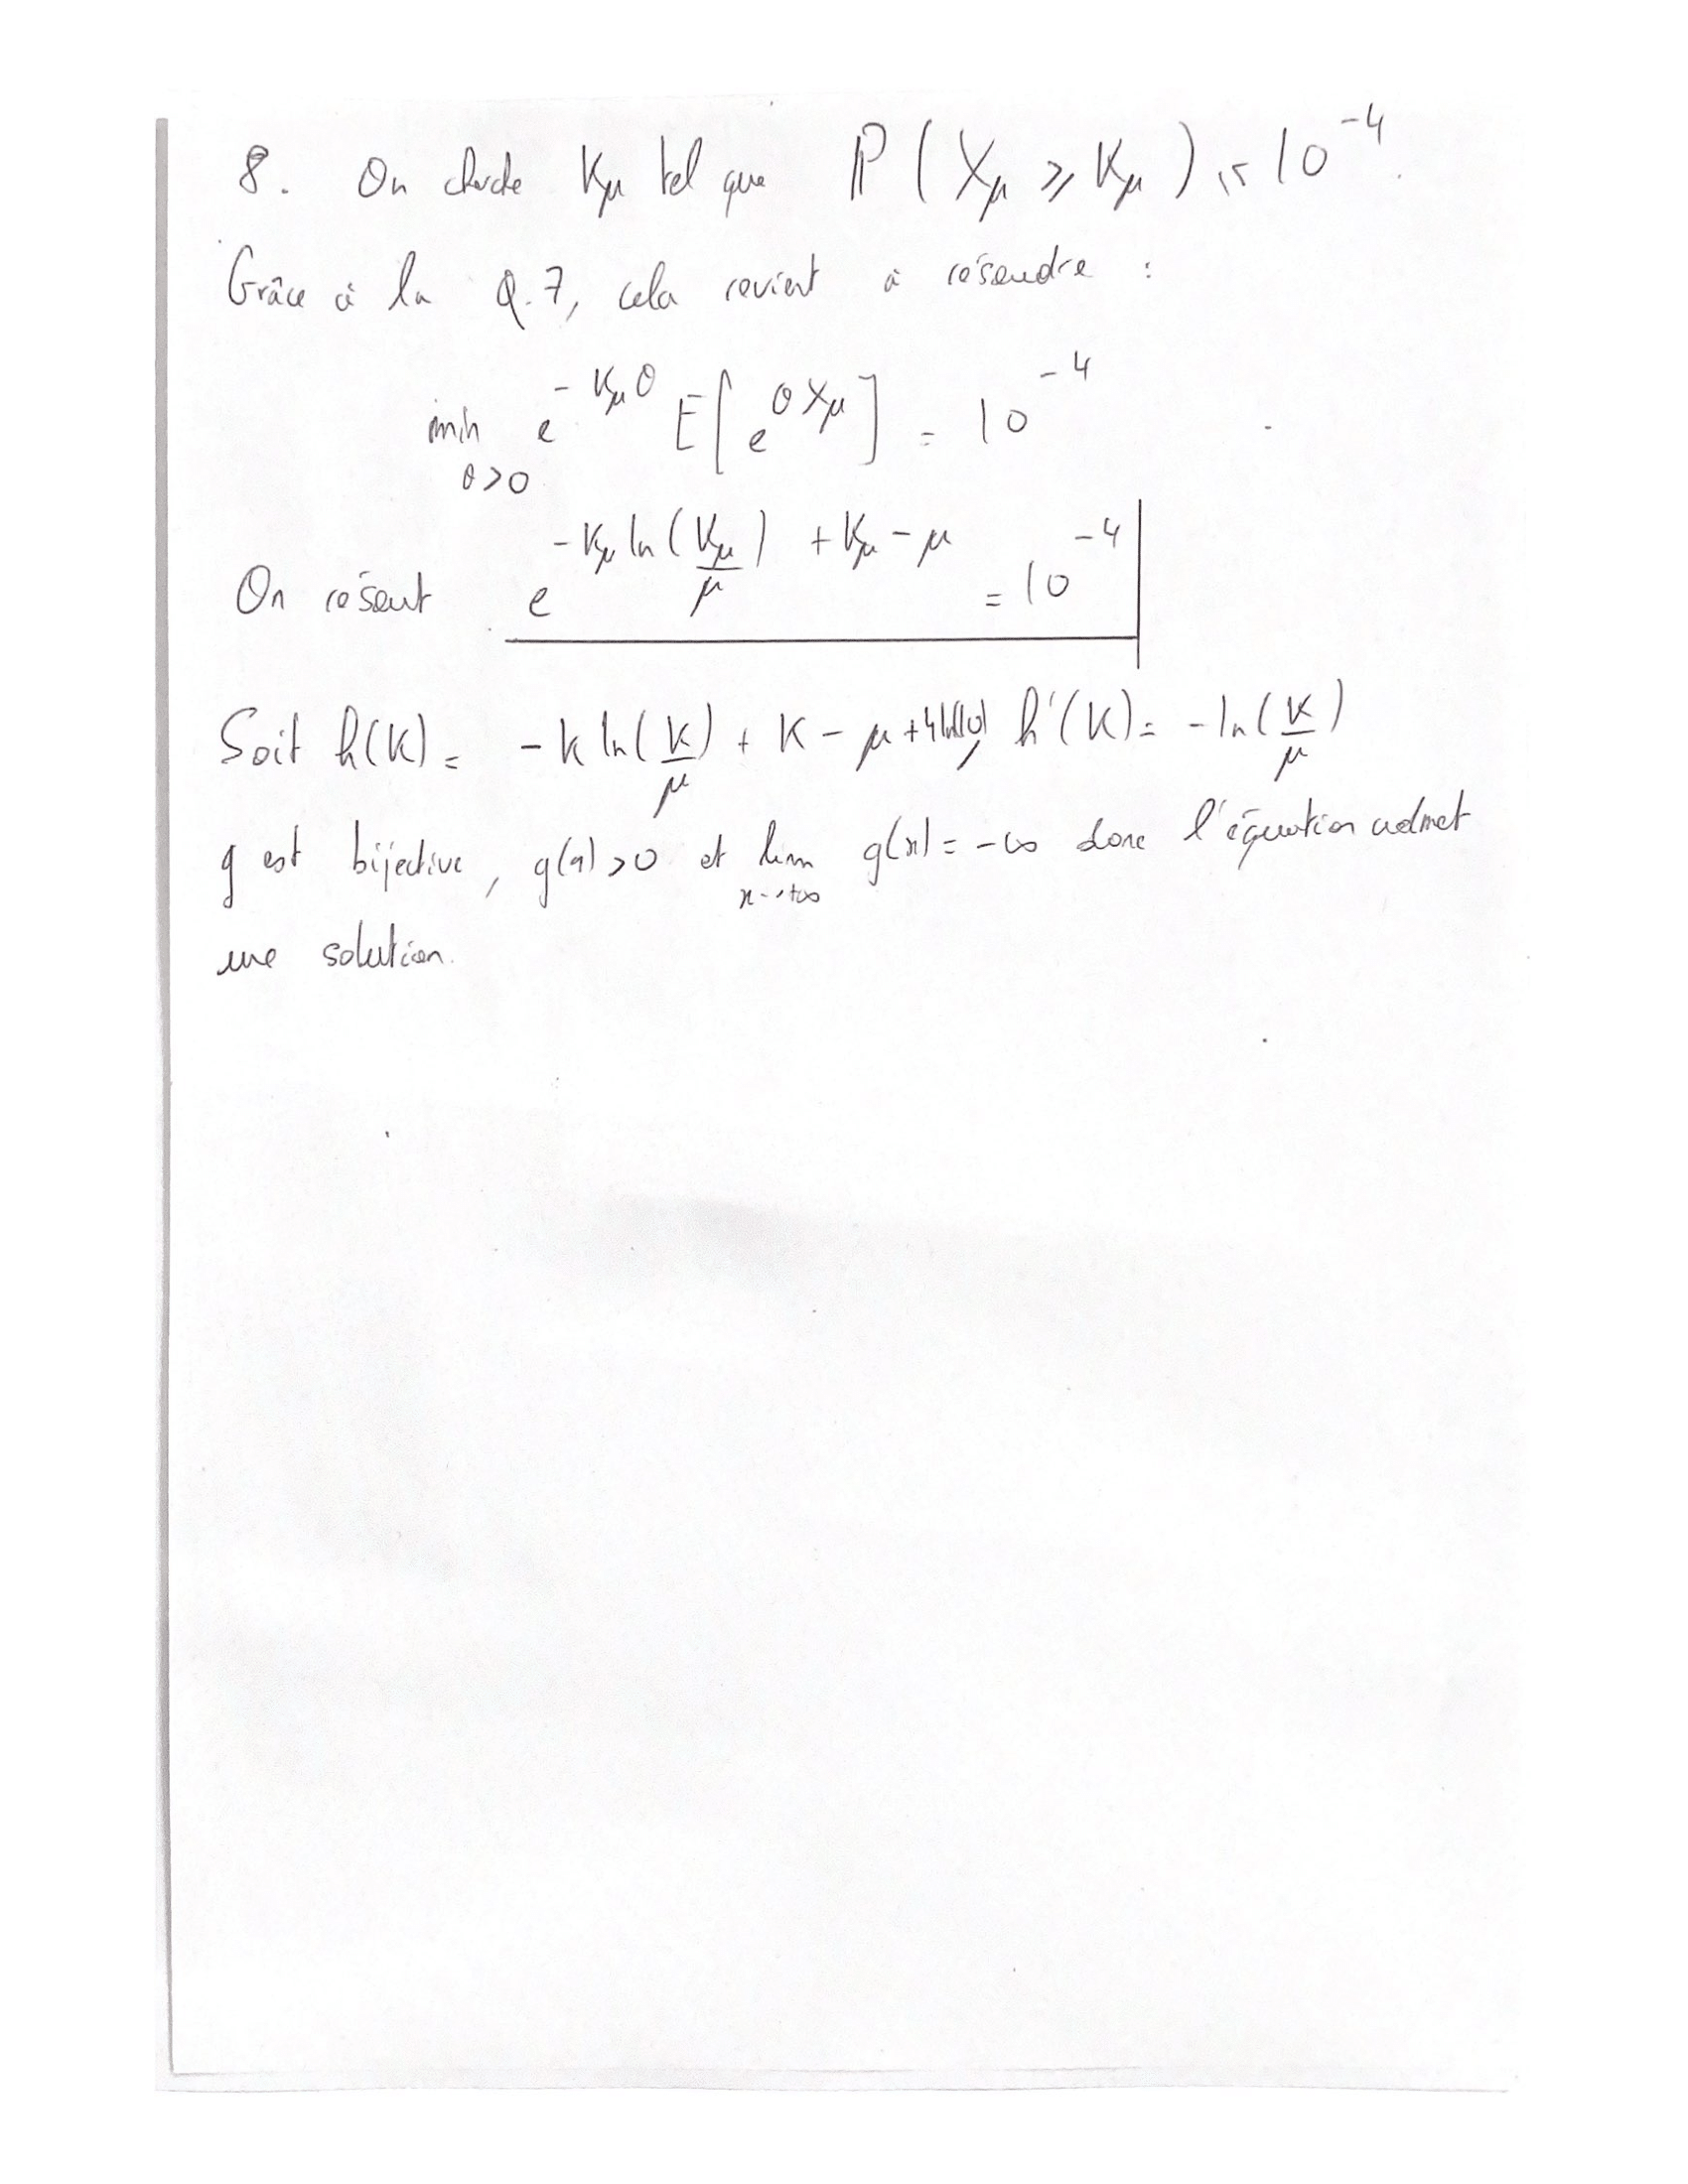r 

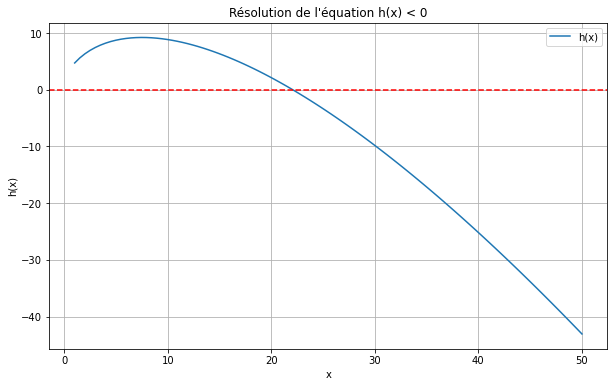

In [97]:
import numpy as np
import matplotlib.pyplot as plt

def h(K, mu):
    """
    Calcule la valeur de la fonction h pour une valeur donnée de K et de mu.
    """
    return -K*np.log(K/mu) + K - mu + 4 * np.log(10)

# Crée un tableau de 100 valeurs de K comprises entre 1 et 50
x = np.linspace(1, 50, 100)

# Calcule les valeurs correspondantes de g(K) pour mu = 7.5129
y = h(x, 7.5129)

# Trace la courbe de g(K) en fonction de K
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='h(x)')

# Trace une ligne horizontale rouge pointillée pour g(K) = 0
plt.axhline(0, color='r', linestyle='--')

# Ajoute les légendes et les titres
plt.title('Résolution de l\'équation h(x) < 0')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.legend()

# Active la grille
plt.grid(True)

# Affiche le graphique
plt.show()


## Question 9

*Using the ``numpy.convolve``, build the vector representing the distribution of F.*


Les différents $\zeta_k$ n'ont pas la même distribution donc le seuil ne sera pas atteint en même temps et les vecteurs n'auront donc pas la même longueur. Pour régler ce problème nous allons ajouter k-1 zéros entre chaque valeur de la distribution $\zeta_k$ pour obtenir la distribution de $k \zeta_k$

In [87]:
import scipy.stats as stats
import numpy as np

In [88]:
# Given values
C = 200e3  # bits per second
W = 250e3  # Hz
K = 10**6
gamma = 2.8
p = 0.01
lambda_u = 0.01  # users per square meter
R = 300  # meters
SNR_min = 0.1

In [89]:
# Computation of N_max
N_max = math.ceil(C/(W * math.log2(1 + SNR_min)))
N_max

6

On construit d'abord les vecteurs $\zeta_k$ 

In [90]:
def poisson(mu, threshold) :
    """
    Give the probability distribution of a r.v. X which follows a Poisson distribution of parameter lambda
    input :
        mu : parameter of the distribution
        threshold : such that the cdf of X is less than the threshold
    output :
        distribution : array which contains the values of P(X = k)
    """

    distrib = []
    k = 0

    distrib_value = math.exp(-mu)

    while stats.poisson.cdf(k, mu) < 1 - threshold :
        distrib.append(distrib_value)
        distrib_value = distrib_value * mu / (k + 1)
        k += 1
        
    return np.array(distrib)

In [91]:
# On va calculer les valeurs des différents rayons afin d'avoir les paramètres mu des lois de poissons des ksi_k 
Rayon_values = [0]

for k in range (1, N_max + 1) :
    Rayon_values.append((K / (2**(C / (W * k)) - 1))**(1/gamma))

mu_list = []
mu_list = [p * lambda_u * np.pi * (Rayon_values[k] **2 - Rayon_values[k-1] **2) for k in range(1, N_max + 1)]

# On calcule ensuite les densités 

list = []
for m in mu_list :
    list.append(poisson(m, 0.0001))

# ajout de zéros 
max_length = max(len(value) for value in list)
ksi_distribs = np.zeros((len(list), max_length))

for i, value in enumerate(list) :
    ksi_distribs[i, :len(value)] = value

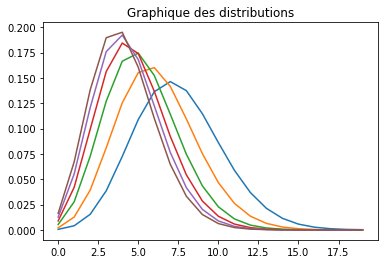

In [92]:
for k in range(N_max) :
    plt.plot([k for k in range(max_length)], ksi_distribs[k])

plt.title('Graphique des distributions')  # Ajoute un titre à l'image
plt.show()


Puis on réarrange les listes pour calculer les vecteurs distributions $k\zeta_k$ 

In [93]:
def add_zeros_between_elements(arr, k):
    """
    Ajoute k zéros entre chaque élément d'un tableau arr

    Parameters:
    arr (numpy array): Tableau d'entrée
    k (int): Nombre de zéros à ajouter entre chaque élément

    Returns:
    numpy array: Nouveau tableau avec k zéros ajoutés entre chaque élément
    """
    # Calcul de la nouvelle longueur du tableau
    new_length = len(arr) + (len(arr) - 1) * k

    # On crée nouveau tableau de zéros de la nouvelle longueur
    result = np.zeros(new_length, dtype=arr.dtype)

    # Ajout des éléments du tableau d'origine dans le nouveau tableau en laissant k zéros entre chaque élément
    
    result[::k + 1] = arr

    return result



In [94]:
# Ajout de zéros entre les valeurs des distributions
ksi_liste = [ksi_distribs[k] for k in range(N_max)]

for k in range(N_max):
    ksi_liste[k] = add_zeros_between_elements(ksi_liste[k], k)

# Ajout de zéros pour avoir une matrice avec les distributions
new_max_length = len(ksi_liste[-1])
k_ksi_distribs = np.zeros((N_max, new_max_length))

for i, arr in enumerate(ksi_liste):
    k_ksi_distribs[i, :len(arr)] = arr


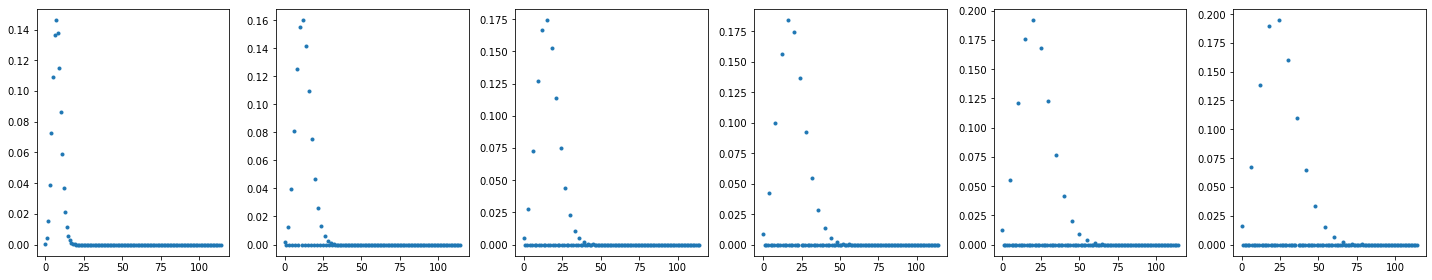

In [95]:
fig, axs = plt.subplots(1, N_max, figsize=(20, 4))

for k, distrib in enumerate(k_ksi_distribs) :
    axs[k].scatter(range(new_max_length), distrib,marker='.')

plt.tight_layout()
plt.show()



Pour le calcul de la loi $F(\phi)$, on va effectuer des convolutions successives comme le conseille l'énoncé. 


In [96]:
F = k_ksi_distribs[0]

for k in range (1, N_max) :
    F = np.convolve(F, ksi_distribs[k], mode='full')

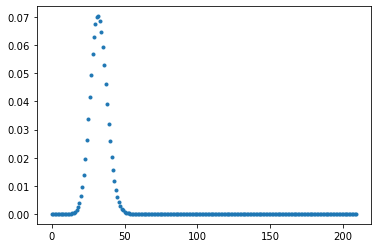

In [78]:
plt.scatter(range(len(F)), F, marker='.')
plt.show()

## Question 10

*Compute $S$ such that the outage probability is smaller than 0.01.*


On cherche le plus petit entier n tel que $ \mathbb P(F \leq n) \geq 0.99 $. On itère donc sur $n$ jusqu'à trouver la bonne valeur pour S. 

In [81]:
pO = 0.01
k = 0

while sum(F[:k + 1]) < 1 - pO :
    k += 1

In [82]:
print(k)

46


On obtient donc :  $S= 46$.